In [22]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [23]:
data=pd.read_csv('AP.csv')
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [25]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [26]:
# month column need to be the index
data.set_index('Month',inplace=True)

In [27]:
data.shape

(144, 1)

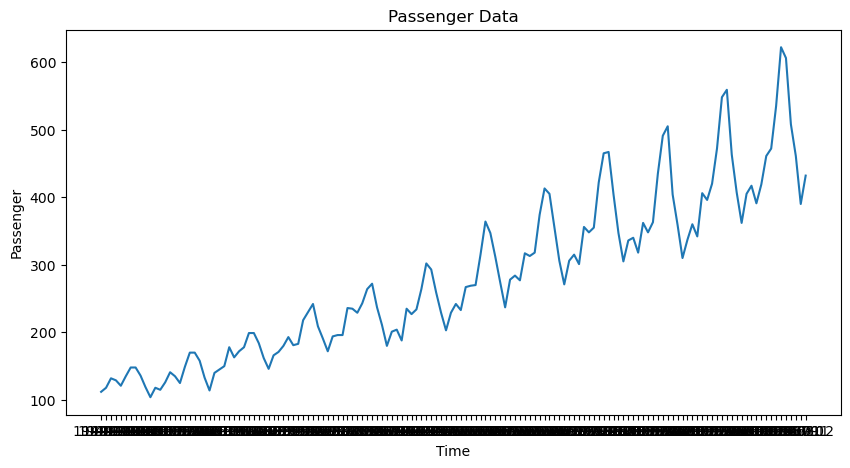

In [28]:
plt.figure(figsize=(10,5))
plt.plot(data['#Passengers'])
plt.xlabel('Time')
plt.ylabel('Passenger')
plt.title('Passenger Data')
plt.show()

# chaeck data is stationary or not 

In [29]:
from statsmodels.tsa.stattools import adfuller

In [20]:
def test_stationarity(timeseries):
    #determining rolling stat
    movingaverage=timeseries.rolling(window=12).mean()
    movingstd=timeseries.rolling(window=12).std()
    #plot rolling stat
    plt.plot(timeseries,color='b',label='Original')
    plt.plot(movingaverage,color='r',label='Rolling mean')
    plt.plot(movingstd,color='black',label='Rolling STD')
    plt.legend(loc='best')
    plt.title('Stationary Check')
    plt.show()
    #performing dicky fuller test
    print('Results')
    air_pass_test=adfuller(timeseries['#Passengers'])
    dfout=pd.Series(air_pass_test[0:4],index=['Test Stat','P Value','# Lags Used','No. of obse'])
    for key,value in air_pass_test[4].items():
        dfout['critical Values(%s'%key]=value
        print(dfout)


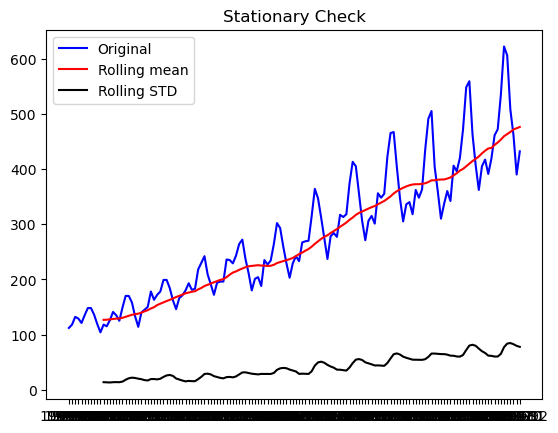

Results
Test Stat               0.815369
P Value                 0.991880
# Lags Used            13.000000
No. of obse           130.000000
critical Values(1%     -3.481682
dtype: float64
Test Stat               0.815369
P Value                 0.991880
# Lags Used            13.000000
No. of obse           130.000000
critical Values(1%     -3.481682
critical Values(5%     -2.884042
dtype: float64
Test Stat                0.815369
P Value                  0.991880
# Lags Used             13.000000
No. of obse            130.000000
critical Values(1%      -3.481682
critical Values(5%      -2.884042
critical Values(10%     -2.578770
dtype: float64


In [21]:
test_stationarity(data)

In [60]:
# SERIIES STILL IS NON STATIONARY ,P VALUE REDUCED WITH LOG TRANSFORMATION 

Apply some transformations to make time series stationary

In [61]:
#Log transformations 
airpass_log=np.log(data)

In [62]:
airpass_log

,#Passengers
Month,
1949-01,4.718499
1949-02,4.770685
1949-03,4.882802
1949-04,4.859812
1949-05,4.795791
...,...
1960-08,6.406880
1960-09,6.230481
1960-10,6.133398


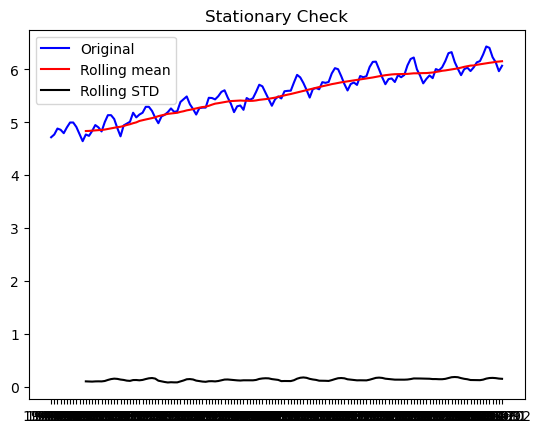

Results
Test Stat              -1.717017
P Value                 0.422367
# Lags Used            13.000000
No. of obse           130.000000
critical Values(1%     -3.481682
dtype: float64
Test Stat              -1.717017
P Value                 0.422367
# Lags Used            13.000000
No. of obse           130.000000
critical Values(1%     -3.481682
critical Values(5%     -2.884042
dtype: float64
Test Stat               -1.717017
P Value                  0.422367
# Lags Used             13.000000
No. of obse            130.000000
critical Values(1%      -3.481682
critical Values(5%      -2.884042
critical Values(10%     -2.578770
dtype: float64


In [63]:
test_stationarity(airpass_log)

calculate moving average of log data

In [65]:
log_movingAverage=airpass_log.rolling(window=12).mean()
log_movingSTD=airpass_log.rolling(window=13).std()

In [67]:
log_movingAverage.head(20)

,#Passengers
Month,
1949-01,NaN
1949-02,NaN
1949-03,NaN
1949-04,NaN
1949-05,NaN
1949-06,NaN
1949-07,NaN
1949-08,NaN
1949-09,NaN


In [68]:
airpass_new=airpass_log-log_movingAverage

In [70]:
airpass_new.dropna(inplace=True)

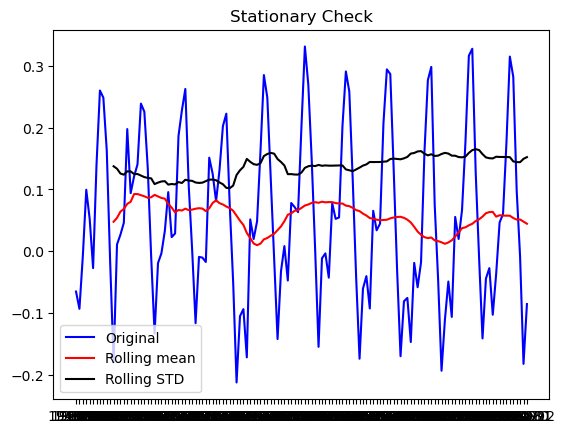

Results
Test Stat              -3.162908
P Value                 0.022235
# Lags Used            13.000000
No. of obse           119.000000
critical Values(1%     -3.486535
dtype: float64
Test Stat              -3.162908
P Value                 0.022235
# Lags Used            13.000000
No. of obse           119.000000
critical Values(1%     -3.486535
critical Values(5%     -2.886151
dtype: float64
Test Stat               -3.162908
P Value                  0.022235
# Lags Used             13.000000
No. of obse            119.000000
critical Values(1%      -3.486535
critical Values(5%      -2.886151
critical Values(10%     -2.579896
dtype: float64


In [71]:
test_stationarity(airpass_new)

after concluding the results from ADFC test 
p-value has reduced from 

SHIFT TRANSFORMATION 

In [72]:
airpass_timeshift=airpass_log-airpass_log.shift()

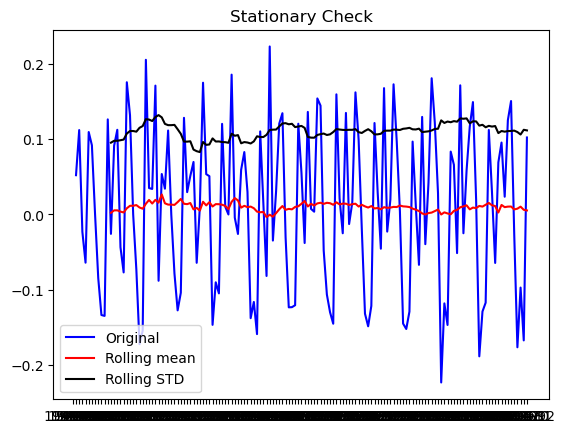

Results


MissingDataError: exog contains inf or nans

In [73]:
test_stationarity(airpass_timeshift)

ARIMA is AR+I+MA.Before we see an arima model let us check the results of the individual AR & MA model note that this models will give a
value of RSS lower the RSS values indicates a better model Arima =auto regressive integrated moving average 

DECOMPOSITION 

In [74]:
D=pd.read_csv('AP.csv')

In [75]:
D.columns

Index(['Month', '#Passengers'], dtype='object')

In [78]:
decompose=D[['Month','#Passengers']]
decompose.index=decompose['Month']
decompose=decompose[['#Passengers']]
decompose.head()

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


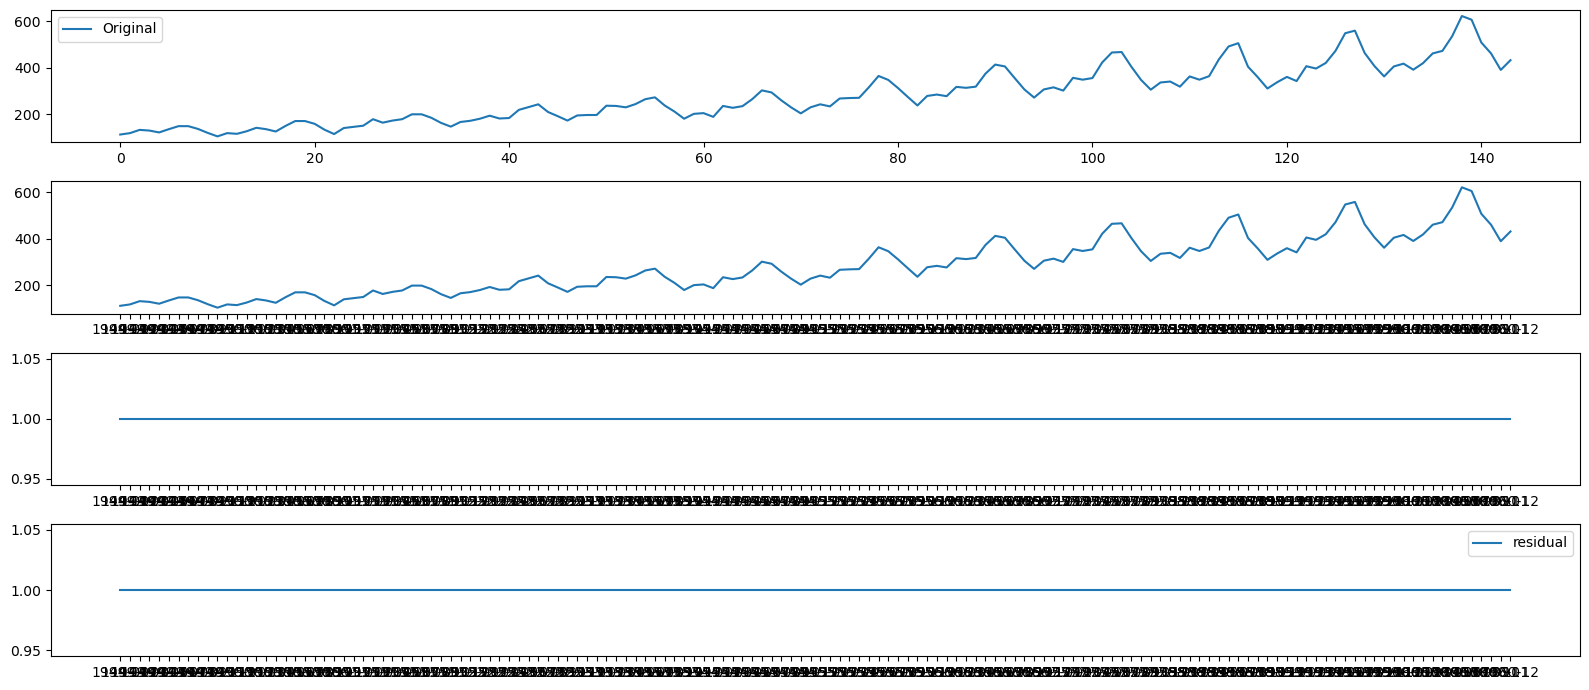

In [82]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(decompose,model='multiplicative',period=1)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.figure(figsize=(16,7))
plt.subplot(411)
plt.plot(D['#Passengers'],label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='trend')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.subplot(414)
plt.plot(residual,label='residual')
plt.legend(loc='best')
plt.tight_layout()



In [84]:
#Time Series Forecasting 
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf,pacf

In [85]:
lag_acf=acf(airpass_timeshift,nlags=20)
lag_pacf=pacf(airpass_timeshift,nlags=20)

in time series analysis the autocorrelation function (ACF) and partial autocorrelation function (PACF) are tools that 
measure the correlation btw values in a time series 

In [86]:
len(airpass_timeshift)

144

In [87]:
np.sqrt(len(airpass_timeshift))

12.0

In [88]:
1.96/np.sqrt(len(airpass_timeshift))

0.16333333333333333

In [107]:
"""
plt.figure(figsize=(16,7))
#plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(airpass_timeshift)),linestyle='--',color='grey')
plt.axhline(y=1.96/np.sqrt(len(airpass_timeshift)),linestyle='--',color='grey')
plt.title('Autocorrelation function')


# plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(airpass_timeshift)),linestyle='--',color='grey')
plt.axhline(y=1.96/np.sqrt(len(airpass_timeshift)),linestyle='--',color='grey')
plt.title('Autocorrelation function')
plt.tight_layout()
"""
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf

# Assuming airpass_timeshift is your time series data
# Replace airpass_timeshift with your actual time series
lag_acf = acf(airpass_timeshift, nlags=20)
lag_pacf = pacf(airpass_timeshift, nlags=20, method='ols')

# Plot ACF and PACF
plt.figure(figsize=(16, 7))

# Plot ACF
plt.subplot(121)
plt.plot(lag_acf, marker='o', color='grey')
plt.axhline(y=0, linestyle='--', color='grey')
plt.axhline(y=-1.96 / np.sqrt(len(airpass_timeshift)), linestyle='--', color='grey')
plt.axhline(y=1.96 / np.sqrt(len(airpass_timeshift)), linestyle='--', color='grey')
plt.title('Autocorrelation Function')

# Plot PACF
plt.subplot(122)
plt.plot(lag_pacf, marker='o', color='grey')
plt.axhline(y=0, linestyle='--', color='grey')
plt.axhline(y=-1.96 / np.sqrt(len(airpass_timeshift)), linestyle='--', color='grey')
plt.axhline(y=1.96 / np.sqrt(len(airpass_timeshift)), linestyle='--', color='grey')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()


LinAlgError: SVD did not converge in Linear Least Squares

In [93]:
# ACF-Determine MA model Q=1 -2=2
#PACF-AR model P=1-2=2
#ARIMA=(p,q,d)
# p=autoregressive part 
#q=differentiation part 
#d=moving average part 

plotting AR Model


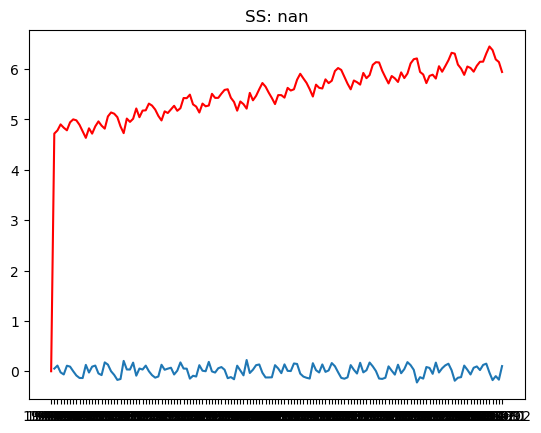

In [106]:
#AR Model

"""import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima_model import ARIMA
model1=ARIMA(airpass_log,order=(2,1,0))#p=2 (AR
results_AR=model1.fit()

plt.plot(airpass_timeshift)# differencing =1
plt.plot(results_AR.fittedvalues,color='red')
plt.title('SS:%.4F'%sum((results_AR.fittedvalues-airpass_timeshift['#Passengers'])**2))
                        
print('plotting AR Model')
"""
from statsmodels.tsa.arima.model import ARIMA  # Correct import for recent versions

# Initialize ARIMA model
model1 = ARIMA(airpass_log, order=(2, 1, 0))  # p=2, d=1, q=0

# Fit the model
results_AR = model1.fit()

# Plot results
plt.plot(airpass_timeshift)  # Replace 'airpass_timeshift' with your data variable
plt.plot(results_AR.fittedvalues, color='red')
plt.title(
    f'SS: {sum((results_AR.fittedvalues - airpass_timeshift["#Passengers"])**2):.4f}'
)
print('plotting AR Model')


In [ ]:
# MA model


by combining AR and MA into ARIMA ,we see that RSS value is decreased from either case to 1.0292

In [38]:
df=pd.read_excel(r"C:\Users\DELL\Documents\Book2.xlsx")
df.head()

,PROBLEM 1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PARTICULARS,CASE 1,CASE 2,CASE 3
2,NaN,NaN,NaN,NaN,Profit before interest and taxes,1250000000,1250000000,1250000000
3,NaN,NaN,NaN,NaN,Interest(-),21600000.0,10800000.0,0
4,NaN,NaN,NaN,NaN,Profit before taxes,1228400000,1239200000,1250000000


# DATE TIME MANIPULATION 

In [49]:
date_range=pd.date_range('4/12/2021',periods=12,freq='y')#it will give the last date of every next month and if year it will give last date of every month  evry year 

dates=pd.DataFrame(date_range,columns=['Date'])

In [50]:
dates

,Date
0,2021-12-31
1,2022-12-31
2,2023-12-31
3,2024-12-31
4,2025-12-31
5,2026-12-31
6,2027-12-31
7,2028-12-31
8,2029-12-31
9,2030-12-31


In [52]:
dates['Day']=dates['Date'].dt.day
dates['Month']=dates['Date'].dt.month
dates['Year']=dates['Date'].dt.year
dates

,Date,Day,Month,Year
0,2021-12-31,31,12,2021
1,2022-12-31,31,12,2022
2,2023-12-31,31,12,2023
3,2024-12-31,31,12,2024
4,2025-12-31,31,12,2025
5,2026-12-31,31,12,2026
6,2027-12-31,31,12,2027
7,2028-12-31,31,12,2028
8,2029-12-31,31,12,2029
9,2030-12-31,31,12,2030


In [53]:
dates=pd.date_range('1/1/2000',periods=7)
ts=pd.Series(np.arange(7),index=dates)

print(ts)

2000-01-01    0
2000-01-02    1
2000-01-03    2
2000-01-04    3
2000-01-05    4
2000-01-06    5
2000-01-07    6
Freq: D, dtype: int32


In [54]:
# export your file where ever you want 

In [57]:
ts.to_csv(r"C:\Users\DELL\Downloads\train.csv")


In [59]:
daterange=pd.date_range('2021/9/21',periods=6)
dates=pd.DataFrame(daterange,columns=['Date'])